In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
data = pd.read_csv('train.csv')
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [4]:
data['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [3]:
data.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           574 non-null    int64  
 1   nums/length username  574 non-null    float64
 2   fullname words        574 non-null    int64  
 3   nums/length fullname  574 non-null    float64
 4   name==username        574 non-null    int64  
 5   description length    574 non-null    int64  
 6   external URL          574 non-null    int64  
 7   private               574 non-null    int64  
 8   #posts                574 non-null    int64  
 9   #followers            574 non-null    int64  
 10  #follows              574 non-null    int64  
 11  fake                  574 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 58.3 KB


In [7]:
 data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02,574.000000,574.000000
mean,0.700348,0.162822,1.459930,0.036220,0.034843,22.618467,0.116725,0.383275,107.477352,8.559514e+04,508.972125,0.500000
std,0.458505,0.212079,1.054019,0.125321,0.183542,37.742016,0.321372,0.486609,402.682002,9.117223e+05,919.341307,0.500436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,58.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,80.750000,7.132500e+02,587.750000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


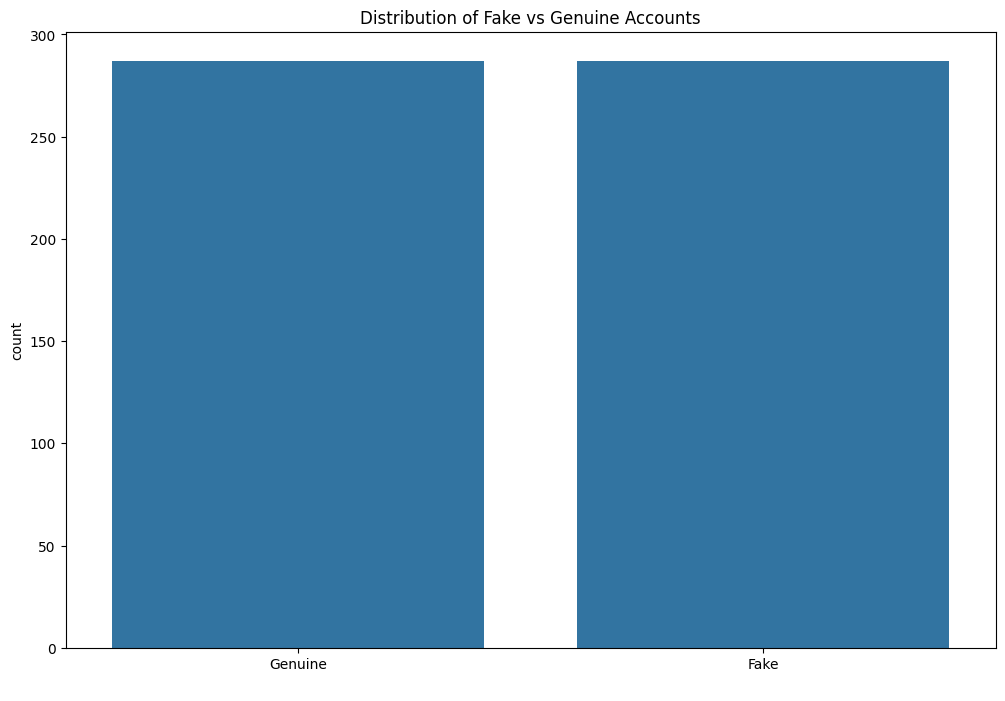

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='fake', data=data)
plt.title('Distribution of Fake vs Genuine Accounts')
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fake'])
plt.xlabel(' ')
plt.show()

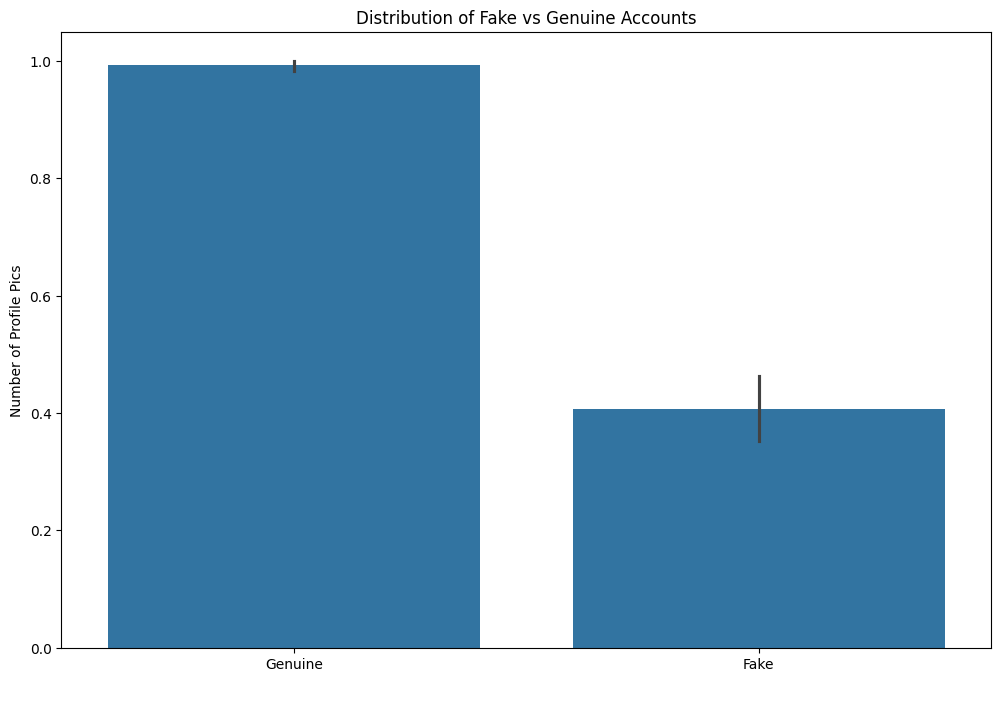

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x='fake',y='profile pic', data=data)
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fake'])
plt.title('Distribution of Fake vs Genuine Accounts')
plt.ylabel('Number of Profile Pics')
plt.xlabel(' ')
plt.show()

# The cap give the diffrent opinion So what to do

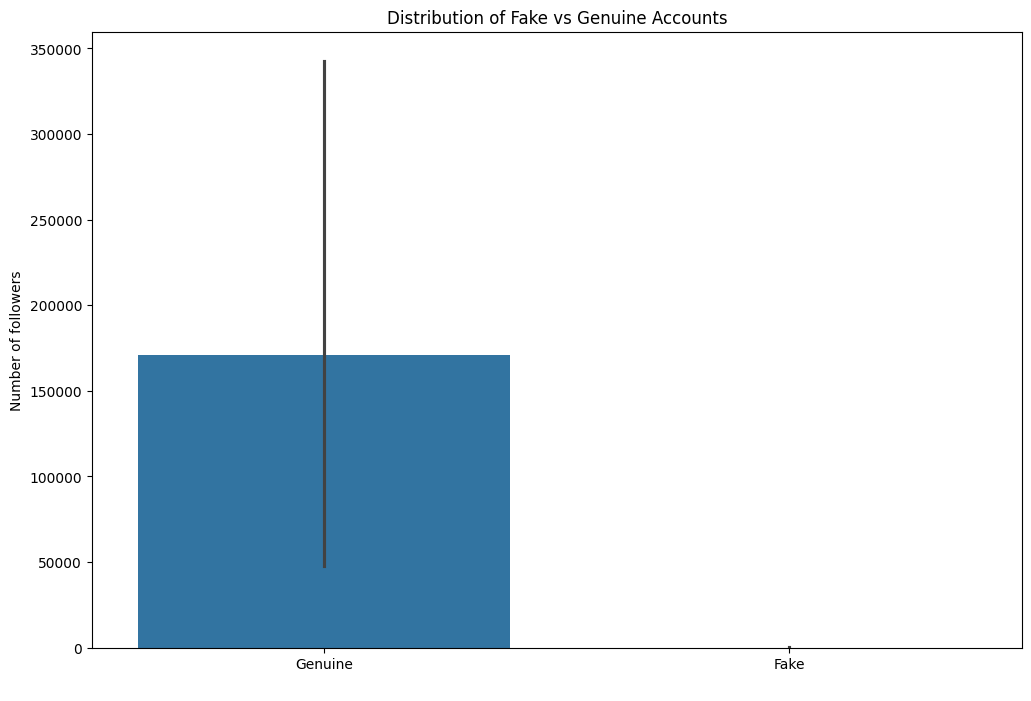

In [10]:

plt.figure(figsize=(12,8))
sns.barplot(x='fake',y='#followers', data=data)
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fake'])
plt.title('Distribution of Fake vs Genuine Accounts')
plt.ylabel('Number of followers')
plt.xlabel(' ')
plt.show()

C:\Users\cc\AppData\Local\Temp\ipykernel_380\1420265507.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fake',y='#followers', data=data,ci=None)


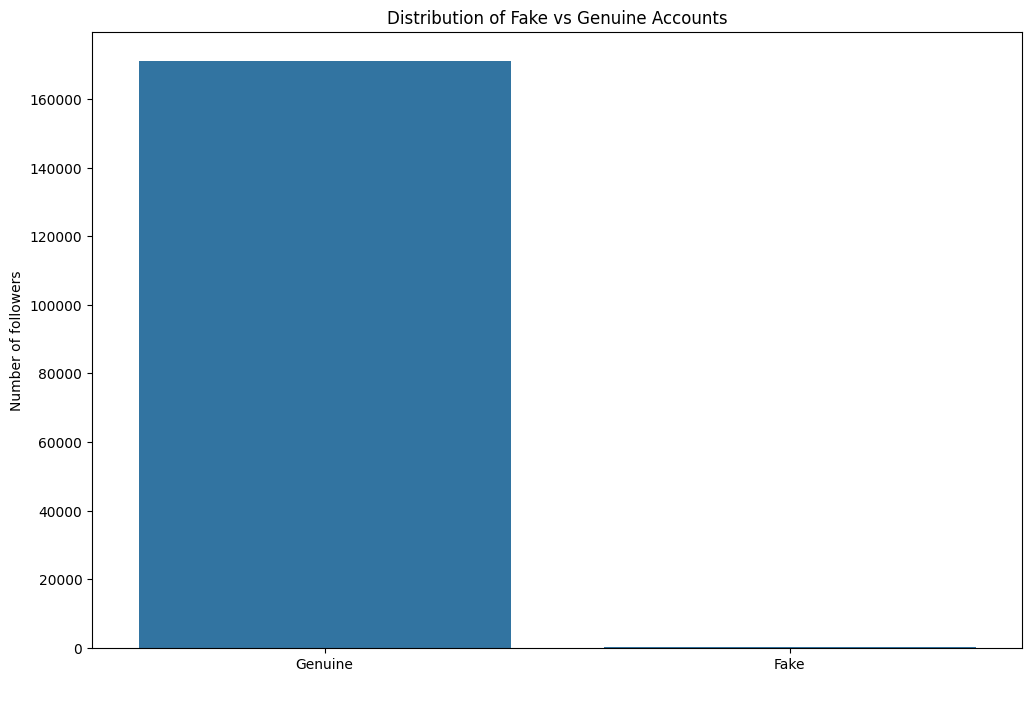

In [11]:

plt.figure(figsize=(12,8))
sns.barplot(x='fake',y='#followers', data=data,ci=None)
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fake'])
plt.title('Distribution of Fake vs Genuine Accounts')
plt.ylabel('Number of followers')
plt.xlabel(' ')
plt.show()

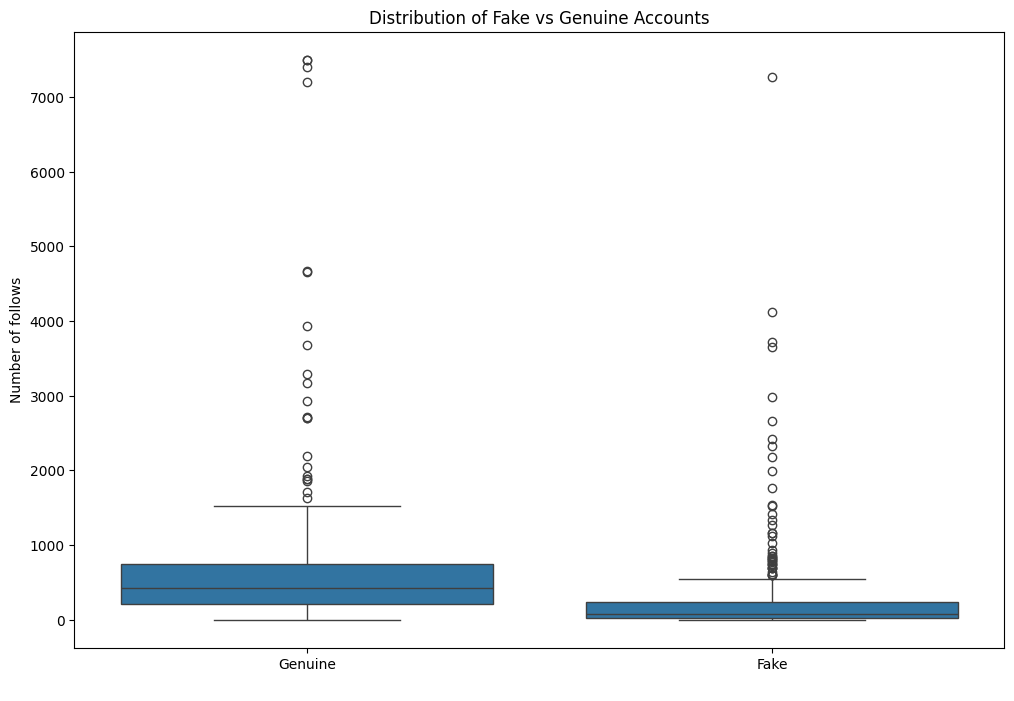

In [12]:

plt.figure(figsize=(12,8))
sns.boxplot(x='fake',y='#follows', data=data)
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fake'])
plt.title('Distribution of Fake vs Genuine Accounts')
plt.ylabel('Number of follows')
plt.xlabel(' ')
plt.show()

C:\Users\cc\AppData\Local\Temp\ipykernel_7220\1340784825.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fake',y='#posts', data=data,ci =None)


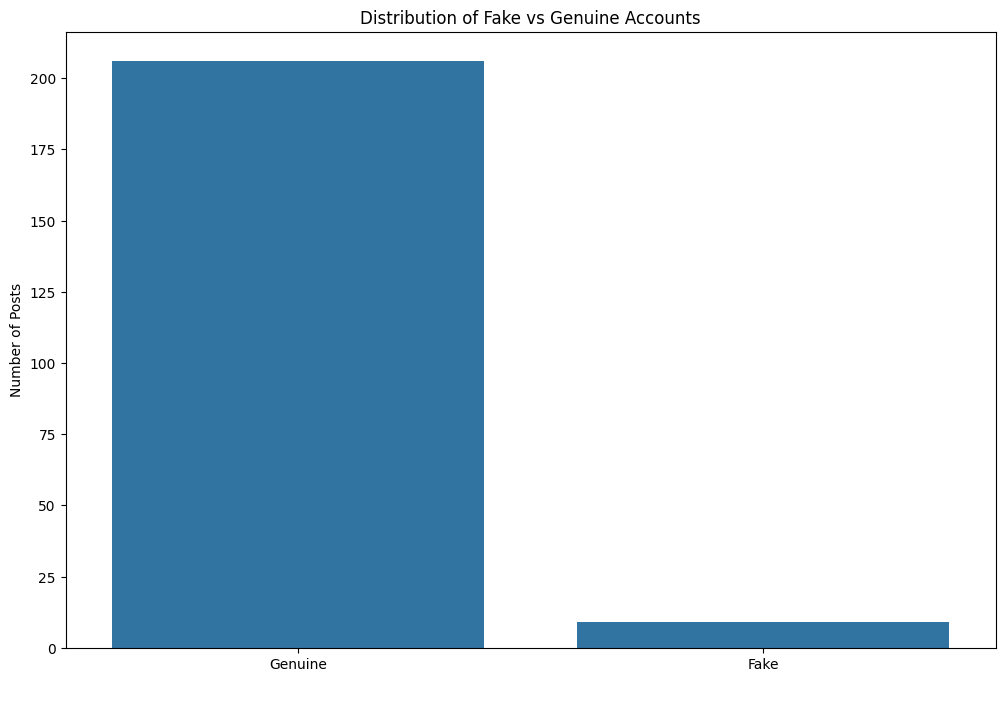

In [35]:

plt.figure(figsize=(12,8))
sns.barplot(x='fake',y='#posts', data=data,ci =None)
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fake'])
plt.title('Distribution of Fake vs Genuine Accounts')
plt.ylabel('Number of Posts')
plt.xlabel(' ')
plt.show()

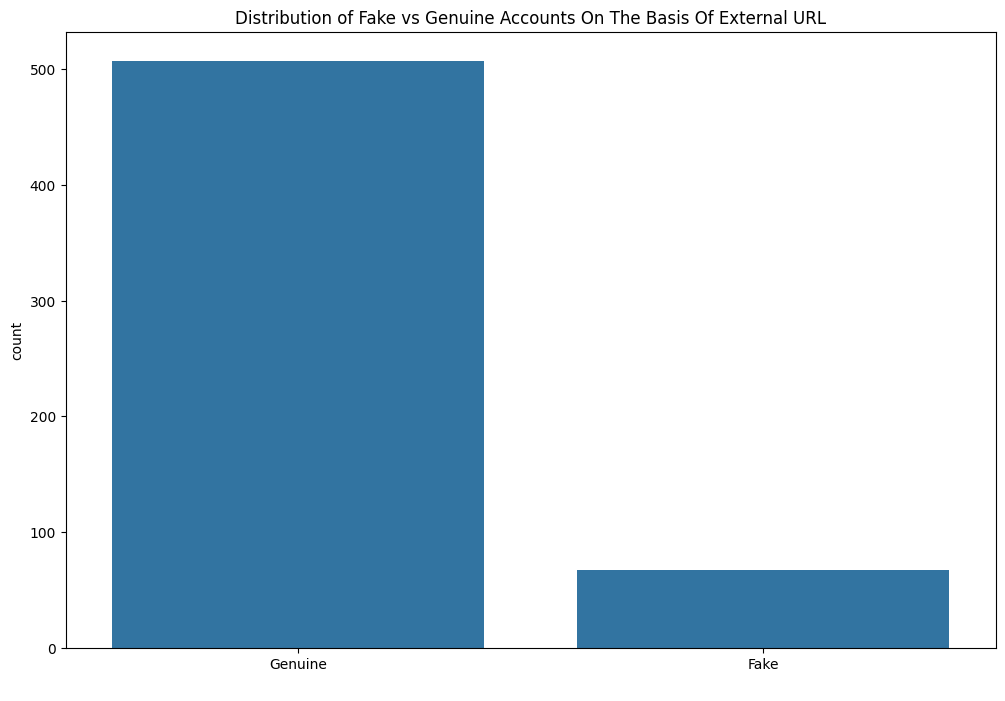

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x='external URL', data=data)
plt.title('Distribution of Fake vs Genuine Accounts On The Basis Of External URL')
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fake'])
plt.xlabel(' ')
plt.show()

In [3]:
# scaled_data is a modified version of your dataset where the numerical values 
#have been adjusted (scaled) to be on a similar range. This helps machine learning models perform better.

In [5]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 scaled_features = scaler.fit_transform(data.drop('fake',axis=1))
 scaled_data = pd.DataFrame(scaled_features,columns=data.columns[:-1])
 scaled_data['fake'] = data['fake']

In [8]:
 x = scaled_data.drop('fake', axis=1)
 y = scaled_data['fake']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
 model = RandomForestClassifier(n_estimators=100,random_state=42)
 model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

C:\Users\cc\AppData\Local\Temp\ipykernel_8220\3274473473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=X.columns[indices], x=importances[indices],palette='viridis')


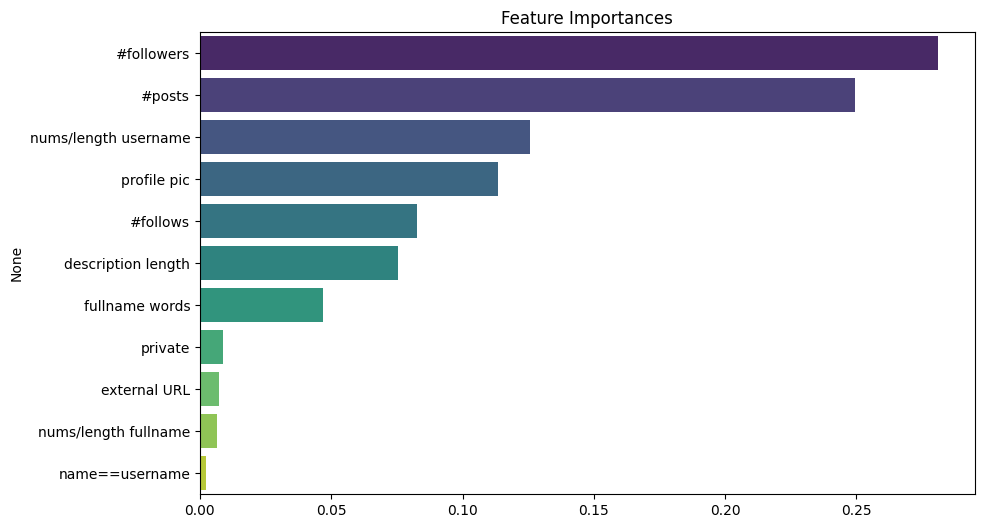

In [14]:
 importances = model.feature_importances_
 indices = np.argsort(importances)[::-1]
 plt.figure(figsize=(10, 6))
 plt.title("Feature Importances")
 sns.barplot(y=X.columns[indices], x=importances[indices],palette='viridis')
 plt.show()

In [16]:
 y_pred = model.predict(x_test)
# Evaluate the model
 print("Classification Report:\n", classification_report(y_test,y_pred))
 print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        80
           1       0.95      0.86      0.90        64

    accuracy                           0.92       144
   macro avg       0.92      0.91      0.91       144
weighted avg       0.92      0.92      0.92       144

Confusion Matrix:
 [[77  3]
 [ 9 55]]


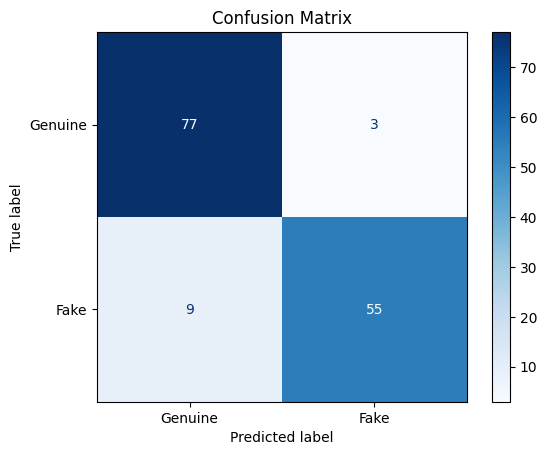

In [17]:
 from sklearn.metrics import ConfusionMatrixDisplay
 ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels=['Genuine', 'Fake'], cmap='Blues')
 plt.title("Confusion Matrix")
 plt.show()